In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
def make_DataFrame(df, variables):
    df['Date'] = pd.DatetimeIndex(pd.to_datetime(df["Date"], dayfirst=True, unit='M'))
    df = df.set_index('Date')[variables]
    df.index = df.index.floor('D')

    idx = pd.date_range(start='2012-01-01', end='2018-12-01', freq='M') +  pd.offsets.MonthBegin(1)
    dff = pd.DataFrame(index=idx)
    dff.index.name = 'Date'

    df = dff.join(df)

    return df

parties_df = pd.read_excel("VolebniPruzkumy_Median.xlsx")
parties_df.head()

,Date,From,To,N_respondents,%_definitely_voting,%_probably_voting,%_probably_not_voting,%_definitely_not_voting,CSSD,ODS,...,Strana zelenych,Ostatni,ANO,Usvit,Pirati,SPD,STAN,SPO,KDU-CSL + STAN,LIMIT
0,2012-03-01,17. 3.,16. 4.,1021,28.0,35.0,16.0,21.0,31.0,19.5,...,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-04-01,17. 4.,16. 5.,925,30.0,32.0,17.0,21.0,32.5,20.5,...,2.0,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-05-01,17. 5.,16. 6.,936,29.5,30.0,18.0,22.5,26.0,22.5,...,3.5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-08-01,17. 8.,17. 9.,962,33.5,30.0,15.0,21.5,25.5,21.0,...,2.0,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-09-01,17. 9.,16. 10.,1108,29.5,35.5,14.5,20.5,28.5,20.0,...,3.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Průřezová data
- preference jednotlivých politických stran v jednom průzkumu
- vybereme několik politických stran a jedno datum
- zobrazíme jejich preference v procentech

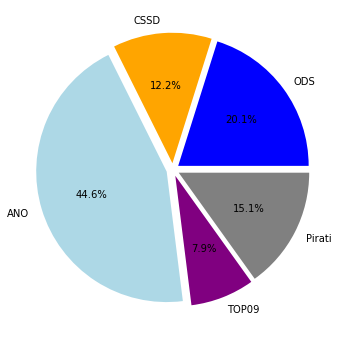

In [8]:
parties = ['ODS', 'CSSD', 'ANO', 'TOP09', 'Pirati']
colors = ['blue', 'orange', 'lightblue', 'purple', 'grey']
df = parties_df[parties].iloc[-1]

fig, ax = plt.subplots(figsize=(9,6))
ax.pie(list(df.values), labels=parties, explode=np.repeat(0.05, len(parties)),
        colors=colors, labeldistance=1.1, autopct='%1.1f%%')
plt.show()

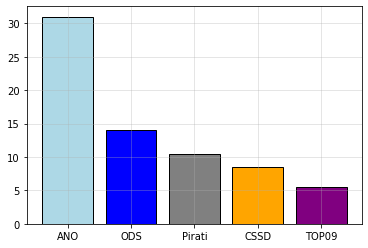

In [16]:
df = pd.DataFrame(parties_df[parties].iloc[-1])
df.columns = ['percent']
df['color'] = colors
df.sort_values('percent', ascending=False, inplace=True)

plt.bar(df.index, df.percent, color=df.color, edgecolor='black')
plt.grid(alpha=0.4)

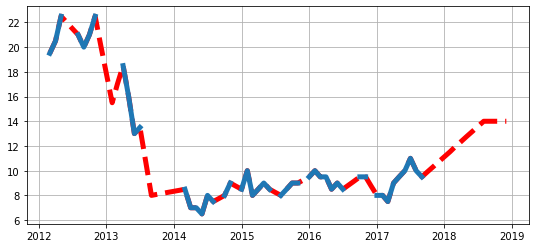

In [10]:

df = make_DataFrame(parties_df, ['ODS'])
df['ODS_interp'] = df.interpolate()

fig, ax = plt.subplots(figsize=(9,4))
ax.plot(df.index, df['ODS_interp'], color='r', linestyle='dashed', linewidth=5)
ax.plot(df.index, df['ODS'], linewidth=5)
ax.grid()

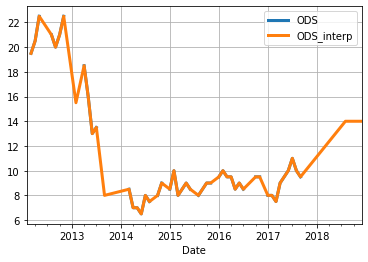

In [11]:
df.plot(grid=True, linewidth=3)
plt.show()

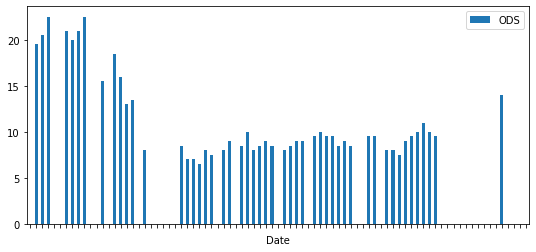

In [12]:
df = make_DataFrame(parties_df, ['ODS'])

fig, ax = plt.subplots(figsize=(9,4))
df.plot(kind='bar', ax=ax)

ax.set_xticklabels([])

plt.show()

<ipython-input-13-d0f5e727c8aa>:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(df.index, df['ODS'] )


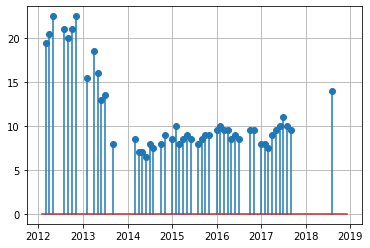

In [13]:
plt.stem(df.index, df['ODS'] )
plt.grid()

## Více časových řad
### víc line plotů
- vývoj preferencí více politických stran zároveň
- jak si mezi sebou kradou strany voliče?

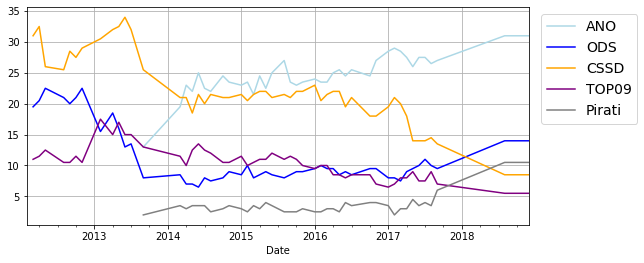

In [14]:
parties = ['ANO', 'ODS', 'CSSD', 'TOP09', 'Pirati']
colors = ['lightblue', 'blue', 'orange', 'purple', 'grey']
df = make_DataFrame(parties_df, parties)
df.interpolate().plot(grid=1, color=colors, figsize=(9,4))
plt.legend(bbox_to_anchor=(1.01,1), fontsize=14)
plt.show()

### složený sloupcový graf
- vývoj proporcí účasti ve volbách

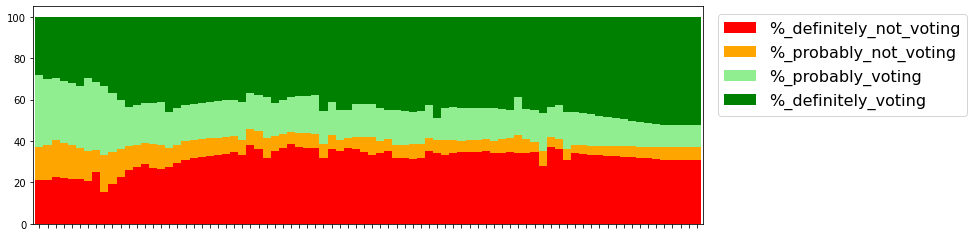

In [18]:
variables = ['%_definitely_voting', '%_probably_voting', '%_probably_not_voting', '%_definitely_not_voting']
df = make_DataFrame(parties_df, variables)
df = df.interpolate().set_index(np.arange(df.shape[0])).dropna().round(2).astype(float)
fig, ax = plt.subplots()
df[df.columns[::-1]].plot(kind='bar', stacked=True, figsize=(12,4), ax=ax, width=1, color=['green', 'lightgreen', 'orange', 'red'][::-1])
ax.set_xticklabels([])
ax.legend(bbox_to_anchor=(1.01, 1), fontsize=16)
plt.show()

